<a href="https://colab.research.google.com/github/sahdahx/project-dataseries15/blob/main/Sahda_DataSeries15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

# **Project Overview**

## Overview
Through this project, we aim to predict students' test scores based on the number of hours they studied. This project is using machine learning algorithms, including Linear Regression, Decision Tree, and Random Forest, to identify the best-performing model.

## Dataset
The dataset consists of 25 observations with two variables:
- Hours (x): The number of hours students studied.
- Scores (y): The corresponding test scores by the students.
The dataset is used to explore and model the relationship between study hours and test performance.

## Outcome
The best-performing model was selected based on its predictive accuracy and evaluation metrics, offering insights into how study hours influence students' score.


# **Input Data & Exploratory Data Analysis**

In [2]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset using pandas
data = pd.read_excel('student_scores.xlsx')
# This displays the top 7 rows of the data
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [4]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# this describes the basic stat behind the dataset used
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

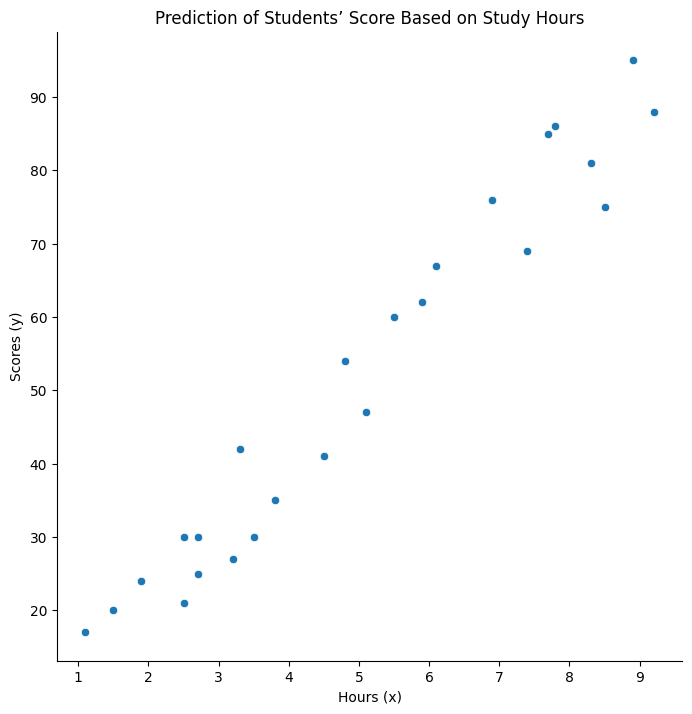

In [6]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(10,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours (x)')
plt.ylabel('Scores (y)')
plt.title('Prediction of Students’ Score Based on Study Hours')
plt.show()

# **Feature Engineering**
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

## Check Duplicated Data

In [7]:
# Check Duplicated Data
df = data.copy()

print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [8]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [29]:
df = df.drop_duplicates()

print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


Before checking for duplicates, the dataset has 25 rows and 2 columns. After identifying and removing any duplicate entries, the dataset remains with 25 rows and 2 columns, indicating that there were no duplicate rows in the data.

## Check Missing Value

In [31]:
# Check missing value
df.isna().sum()

,0
Hours,0
Scores,0



The dataset was checked for missing values in both columns ("Hours" and "Scores"). The result shows that there are no missing values in any of the columns.

## Outlier Analysis

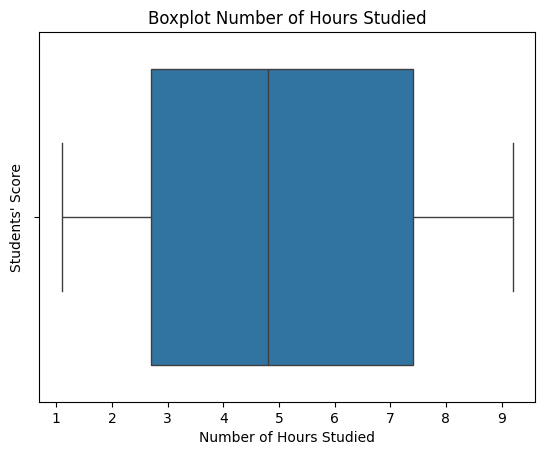

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

plt.xlabel("Number of Hours Studied")
plt.ylabel("Students' Score")
plt.title("Boxplot Number of Hours Studied")

plt.show()

A boxplot analysis was performed to examine the presence of outliers in the "Hours" data. The boxplot shows no significant outliers, meaning the data for the number of hours studied is consistent without extreme values that could skew the analysis. This confirms that the data is suitable for the predictive model without the need for further cleaning related to outliers.

## Encoding Categorical
Since this dataset does not contain any categorical data (all variables are numerical), there is no need for encoding to convert string values into numerical values. As a result, we can skip the encoding process, and proceed directly with the analysis, as all the variables are already numerical and can be used as they are in modeling.

# **Data Splitting**
The dataset is split into training and testing sets, where the training data (X_train, y_train) is used to train the model, and the testing data (X_test, y_test) is used to evaluate the model's performance.

In [10]:
X = df['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [11]:
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [13]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [14]:
# Split the data for train and test
# train : test = 75 : 25 or 80 : 20 or 70:30 or 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [15]:
X_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [16]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


The data is split into training and testing sets using a 80:20 ratio, where 80% of the data is used for training (X_train, y_train) and 20% is used for testing (X_test, y_test).

# **Modelling with Machine Learning**
Regression modelling using Machine Learning algorithms:
- Linear Regression
- Decision Tree
- Random Forest

## Linear Regression

In [17]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy() # Kolom x nya ada 1 saja, jika lebih dari 1 untuk x nya maka tidak code to_numpy() dibiarkan dalam bentuk dataframe
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [18]:
#array
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [19]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [20]:
y_train

,Scores
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30


In [21]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62


In [22]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [24]:
y_train

,Scores
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30


In [25]:
# Predicting the Scores for the Test values
y_pred = lr_model.predict(X_test)

In [26]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [27]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

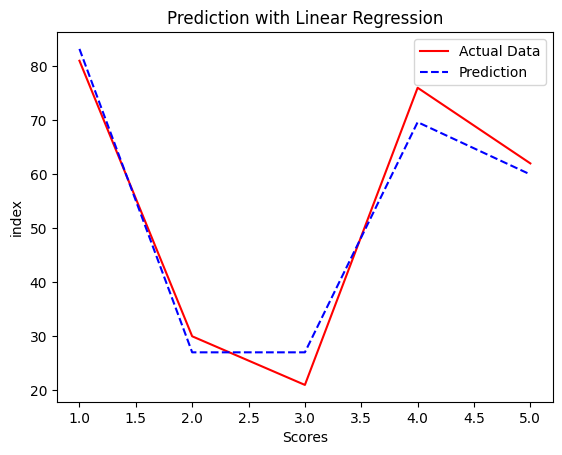

In [28]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
# Predicting the Scores for the Test values
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([75. , 27.5, 27.5, 69. , 67. ])

In [31]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62


In [32]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

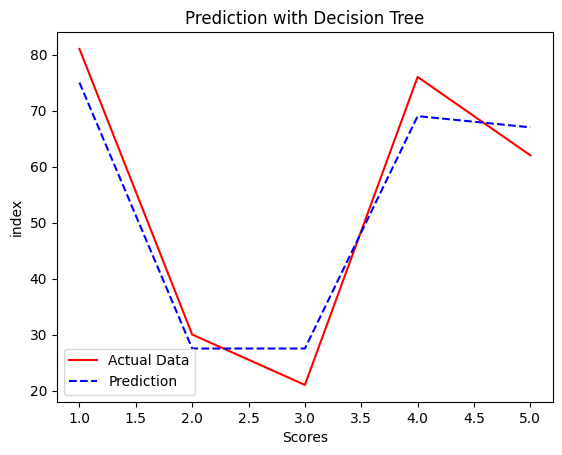

In [33]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
# Predicting the Scores for the Test values
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([79.33      , 26.87666667, 26.87666667, 74.57      , 63.6       ])

In [41]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62


In [44]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

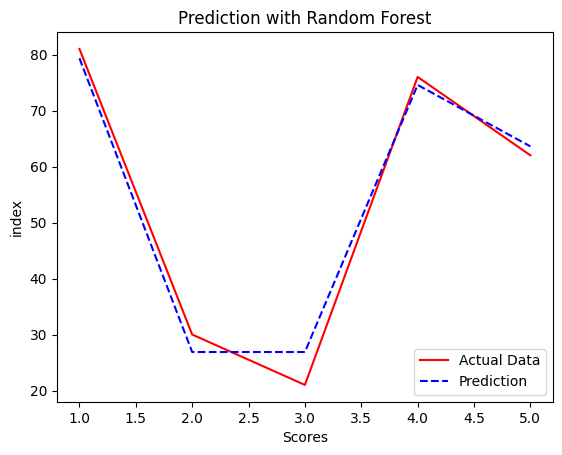

In [45]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

# **Model Evaluation**

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

## Linear Regression

In [34]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9678055545167994


In [35]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.826892353899737
Coefficient of the line Linear Regression: [9.68207815]


![](http://)Then it is said to form a line with result in Linear Regression
# y = 2.8269 + 9.682 x
with x is the value of number of hours studied

## Decision Tree

In [36]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.9461250849762066


## Random Forest

In [46]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)
print('r square Random Forest Results:',rsq_rf)

r square Random Forest Results: 0.982432283405091
